In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
setting_name = 'cs101'

exp_gen_prompt = {
    'pet_dog1': 'gen_prompt_cs101_dog',
    'pet_cat1': 'gen_prompt_cs101_cat',
    'plushie_tortoise': 'gen_prompt_cs101_tortoise', 
    'plushie_teddybear': 'gen_prompt_cs101_teddybear',
    'furniture_chair1': 'gen_prompt_cs101_chair', 
    'furniture_table1': 'gen_prompt_cs101_table',
    'flower_1': 'gen_prompt_cs101_flower',
    'decoritems_woodenpot': 'gen_prompt_cs101_woodenpot',
    'scene_barn': 'gen_prompt_cs101_barn',
}

exp_names_ordered = [
    'pet_dog1',
    'pet_cat1',
    'plushie_tortoise', 
    'plushie_teddybear',
    'furniture_chair1', 
    'furniture_table1',
    'flower_1',
    'decoritems_woodenpot',
    'scene_barn',    
]


all_paths = {}
all_paths['TI'] = {
    # semantic_drift/cs101_ti_barn_steps_1000/1000/clip_alignment_with_anchor_image_cs101_ti_barn_steps_1000_gen_prompt_cs101_barn_t01.csv
    'custom_prompt_A': 'semantic_drift/cs101_ti_{}_steps_1000/1000/clip_alignment_scores_cs101_ti_{}_steps_1000_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_ti_{}_steps_1000/1000/clip_alignment_scores_cs101_ti_{}_steps_1000_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_ti_{}_steps_1000/1000/clip_alignment_scores_cs101_ti_{}_steps_1000_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_ti_{}_steps_1000/1000/clip_alignment_with_anchor_image_cs101_ti_{}_steps_1000_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_ti_{}_steps_1000/1000/dino_alignment_with_anchor_image_cs101_ti_{}_steps_1000_{}_t01.csv',
}

all_paths['TI+TEA'] = {
    # semantic_drift/cs101_ti_decoritems_woodenpot_adjust_embedding_v3/rho0.2_alpha0.5_target_a/1000/clip_alignment_scores_cs101_ti_decoritems_woodenpot_adjust_embedding_v3_gen_prompt_cs101_woodenpot_use_custom_prompt_full_prompt.csv
    # semantic_drift/cs101_barn_adjust_embedding_v3/rho0.2_alpha0.5_target_a/1000/clip_alignment_scores_cs101_barn_adjust_embedding_v3_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    'custom_prompt_A': 'semantic_drift/cs101_ti_{}_adjust_embedding_v3/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_ti_{}_adjust_embedding_v3/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_ti_{}_adjust_embedding_v3/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_ti_{}_adjust_embedding_v3/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_cs101_ti_{}_adjust_embedding_v3_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_ti_{}_adjust_embedding_v3/rho0.2_alpha0.5/1000/dino_alignment_with_anchor_image_cs101_ti_{}_adjust_embedding_v3_{}_t01.csv',
}

all_paths['DB'] = {
    # semantic_drift/cs101_db_lora_rank4_scene_barn/2000/clip_alignment_scores_cs101_db_lora_rank4_scene_barn_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    'custom_prompt_A': 'semantic_drift/cs101_db_lora_rank4_{}/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_db_lora_rank4_{}/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_db_lora_rank4_{}/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_db_lora_rank4_{}/2000/clip_alignment_with_anchor_image_cs101_db_lora_rank4_{}_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_db_lora_rank4_{}/2000/dino_alignment_with_anchor_image_cs101_db_lora_rank4_{}_{}_t01.csv',
}

all_paths['DB+TEA'] = {
    # semantic_drift/cs101_db_lora_rank4_scene_barn_adjust_embedding_v4/rho.5/2000/clip_alignment_scores_cs101_db_lora_rank4_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    'custom_prompt_A': 'semantic_drift/cs101_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_cs101_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_with_anchor_image_cs101_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/dino_alignment_with_anchor_image_cs101_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
}

all_paths['CS'] = {
    # semantic_drift/cs101_custom_diffusion_scene_barn/1000/clip_alignment_scores_cs101_custom_diffusion_scene_barn_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    # semantic_drift/cs101_custom_diffusion_scene_barn/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_scene_barn_gen_prompt_cs101_barn_t01.csv
    'custom_prompt_A': 'semantic_drift/cs101_custom_diffusion_{}/1000/clip_alignment_scores_cs101_custom_diffusion_{}_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_custom_diffusion_{}/1000/clip_alignment_scores_cs101_custom_diffusion_{}_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_custom_diffusion_{}/1000/clip_alignment_scores_cs101_custom_diffusion_{}_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_custom_diffusion_{}/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_{}_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_custom_diffusion_{}/1000/dino_alignment_with_anchor_image_cs101_custom_diffusion_{}_{}_t01.csv',
}

all_paths['CS+TEA'] = {
    # semantic_drift/cs101_custom_diffusion_scene_barn_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_custom_diffusion_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    # semantic_drift/cs101_custom_diffusion_scene_barn_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_t01.csv
    'custom_prompt_A': 'semantic_drift/cs101_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/cs101_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/cs101_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/cs101_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_{}_adjust_embedding_v4_{}_t01.csv',
    'dino_t01': 'semantic_drift/cs101_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/dino_alignment_with_anchor_image_cs101_custom_diffusion_{}_adjust_embedding_v4_{}_t01.csv',
}


            

In [2]:
setting_name = 'celebA'

exp_gen_prompt = {
    '124': 'gen_prompt_actions',
    '181': 'gen_prompt_actions_woman',
    '276': 'gen_prompt_actions',
    '342': 'gen_prompt_actions',
    '351': 'gen_prompt_actions_woman',
    '437': 'gen_prompt_actions',
    '615': 'gen_prompt_actions',
    '908': 'gen_prompt_actions_woman',
    '1335': 'gen_prompt_actions_woman',
    '1429': 'gen_prompt_actions_woman',
}

exp_names_ordered = [
    '124',
    '181',
    '276',
    '342',
    '351',
    '437',
    '615',
    '908',
    '1335',
    '1429',
]


all_paths = {}
all_paths['TI'] = {
    # semantic_drift/celebA_ti_124_steps_1000/1000/clip_alignment_scores_celebA_ti_124_steps_1000_gen_prompt_actions_use_custom_prompt_full_prompt.csv
    'custom_prompt_A': 'semantic_drift/celebA_ti_{}_steps_1000/1000/clip_alignment_scores_celebA_ti_{}_steps_1000_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_ti_{}_steps_1000/1000/clip_alignment_scores_celebA_ti_{}_steps_1000_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_ti_{}_steps_1000/1000/clip_alignment_scores_celebA_ti_{}_steps_1000_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_ti_{}_steps_1000/1000/clip_alignment_with_anchor_image_celebA_ti_{}_steps_1000_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_ti_{}_steps_1000/1000/dino_alignment_with_anchor_image_celebA_ti_{}_steps_1000_{}_t01.csv',
}

all_paths['TI+TEA'] = {
    'custom_prompt_A': 'semantic_drift/celebA_ti_{}/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_ti_{}/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_ti_{}/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_ti_{}_adjust_embedding_v3_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_ti_{}/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_celebA_ti_{}_adjust_embedding_v3_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_ti_{}/rho0.2_alpha0.5/1000/dino_alignment_with_anchor_image_celebA_ti_{}_adjust_embedding_v3_{}_t01.csv',
}

all_paths['DB'] = {
    'custom_prompt_A': 'semantic_drift/celebA_db_lora_rank4_{}/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_db_lora_rank4_{}/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_db_lora_rank4_{}/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_db_lora_rank4_{}/2000/clip_alignment_with_anchor_image_celebA_db_lora_rank4_{}_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_db_lora_rank4_{}/2000/dino_alignment_with_anchor_image_celebA_db_lora_rank4_{}_{}_t01.csv',
}

# all_paths['DB+TEA'] = {
#     # semantic_drift/cs101_db_lora_rank4_scene_barn_adjust_embedding_v4/rho.5/2000/clip_alignment_scores_cs101_db_lora_rank4_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
#     'custom_prompt_A': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectA.csv',
#     'custom_prompt_B': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectB.csv',
#     'full_prompt': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_full_prompt.csv',
#     'vs_anchor_t01': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/clip_alignment_with_anchor_image_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
#     'dino_t01': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.2_alpha0.5/2000/dino_alignment_with_anchor_image_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
# }

all_paths['DB+TEA'] = {
    # semantic_drift/cs101_db_lora_rank4_scene_barn_adjust_embedding_v4/rho.5/2000/clip_alignment_scores_cs101_db_lora_rank4_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    'custom_prompt_A': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.1_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.1_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.1_alpha0.5/2000/clip_alignment_scores_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.1_alpha0.5/2000/clip_alignment_with_anchor_image_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_db_lora_rank4_{}_adjust_embedding_v4/rho0.1_alpha0.5/2000/dino_alignment_with_anchor_image_celebA_db_lora_rank4_{}_adjust_embedding_v4_{}_t01.csv',
}

all_paths['CS'] = {
    # semantic_drift/cs101_custom_diffusion_scene_barn/1000/clip_alignment_scores_cs101_custom_diffusion_scene_barn_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    # semantic_drift/cs101_custom_diffusion_scene_barn/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_scene_barn_gen_prompt_cs101_barn_t01.csv
    'custom_prompt_A': 'semantic_drift/celebA_custom_diffusion_{}/1000/clip_alignment_scores_celebA_custom_diffusion_{}_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_custom_diffusion_{}/1000/clip_alignment_scores_celebA_custom_diffusion_{}_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_custom_diffusion_{}/1000/clip_alignment_scores_celebA_custom_diffusion_{}_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_custom_diffusion_{}/1000/clip_alignment_with_anchor_image_celebA_custom_diffusion_{}_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_custom_diffusion_{}/1000/dino_alignment_with_anchor_image_celebA_custom_diffusion_{}_{}_t01.csv',
}

all_paths['CS+TEA'] = {
    # semantic_drift/cs101_custom_diffusion_scene_barn_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_cs101_custom_diffusion_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_use_custom_prompt_full_prompt.csv
    # semantic_drift/cs101_custom_diffusion_scene_barn_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_cs101_custom_diffusion_scene_barn_adjust_embedding_v4_gen_prompt_cs101_barn_t01.csv
    'custom_prompt_A': 'semantic_drift/celebA_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_objectA.csv',
    'custom_prompt_B': 'semantic_drift/celebA_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_objectB.csv',
    'full_prompt': 'semantic_drift/celebA_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_scores_celebA_custom_diffusion_{}_adjust_embedding_v4_{}_use_custom_prompt_full_prompt.csv',
    'vs_anchor_t01': 'semantic_drift/celebA_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/clip_alignment_with_anchor_image_celebA_custom_diffusion_{}_adjust_embedding_v4_{}_t01.csv',
    'dino_t01': 'semantic_drift/celebA_custom_diffusion_{}_adjust_embedding_v4/rho0.2_alpha0.5/1000/dino_alignment_with_anchor_image_celebA_custom_diffusion_{}_adjust_embedding_v4_{}_t01.csv',
}

In [3]:
import os
import pandas as pd
import numpy as np

step = 1000

all_results = dict()

for exp_name in exp_names_ordered:
    all_results[exp_name] = dict()
    for method in all_paths.keys():
        print(f'---------{exp_name} {method}---------')
        all_results[exp_name][method] = dict()
        for metric in all_paths[method].keys():
            file_path = all_paths[method][metric].format(exp_name, exp_name, exp_gen_prompt[exp_name])
            if not os.path.exists(file_path):
                print(f"File {file_path} does not exist")
                continue
            # else:
            #     print(f"** File {file_path} exists")
            df = pd.read_csv(file_path)
            results = dict()
            temp = []
            for prompt_index in list(df['prompt_index'].unique()):
                prompt_df = df[df['prompt_index'] == prompt_index]
                results[prompt_index] = {
                    'prompt': prompt_df['prompt'].iloc[0],
                    'mean': prompt_df['score'].mean(),
                    'std': prompt_df['score'].std(),
                    'min': prompt_df['score'].min(),
                    'max': prompt_df['score'].max(),
                    'median': prompt_df['score'].median()
                }
                temp.append(prompt_df['score'].mean())
            all_results[exp_name][method][metric] = results
            # calculate the average over all prompts
            print(exp_name, method, metric, np.mean(temp))


metrics_list = ['custom_prompt_A', 'custom_prompt_B', 'full_prompt', 'vs_anchor_t01', 'dino_t01']
# metrics_list = ['full_prompt', 'vs_anchor_t01']


for method in all_paths.keys():
    write_str = f"{method}  & "
    for exp_name in all_results.keys():
        if method in all_results[exp_name].keys():
            temp_str = ""
            for im, metric in enumerate(metrics_list):
                if metric in all_results[exp_name][method].keys():
                    temp = all_results[exp_name][method][metric]
                    if metric == 'dino_t01':
                        scale = 100
                    else:
                        scale = 1
                    temp = [temp[i]['mean'] * scale for i in temp.keys()]
                    avg = np.round(np.mean(temp), 2)
                    A = str(avg)
                else:
                    A = "-"
                if im == len(metrics_list) - 1:
                    temp_str += f"{A}  "
                else:
                    temp_str += f"{A}/ "
            write_str += f"{temp_str}  &  "
        else:
            temp_str = ""
            for im, metric in enumerate(metrics_list):
                if im == len(metrics_list) - 1:
                    temp_str += "- "
                else:
                    temp_str += "-/ "
            write_str += f"{temp_str}  &  "
    print(write_str)


---------124 TI---------
124 TI custom_prompt_A 15.08059321123011
124 TI custom_prompt_B 19.71643802474527
124 TI full_prompt 23.702058369131652
124 TI vs_anchor_t01 68.92682174682616
124 TI dino_t01 0.3842539477918078
---------124 TI+TEA---------
124 TI+TEA custom_prompt_A 15.05288588579963
124 TI+TEA custom_prompt_B 20.076632759430833
124 TI+TEA full_prompt 24.233054199218753
124 TI+TEA vs_anchor_t01 68.47934875039493
124 TI+TEA dino_t01 0.38212531629073265
---------124 DB---------
124 DB custom_prompt_A 14.787653525296378
124 DB custom_prompt_B 20.138874857285444
124 DB full_prompt 25.370866038378544
124 DB vs_anchor_t01 54.77926514569451
124 DB dino_t01 0.34834797007196094
---------124 DB+TEA---------
124 DB+TEA custom_prompt_A 14.6335913142036
124 DB+TEA custom_prompt_B 20.4221778420841
124 DB+TEA full_prompt 25.88607437021592
124 DB+TEA vs_anchor_t01 52.390844845491294
124 DB+TEA dino_t01 0.33194117015227675
---------124 CS---------
124 CS custom_prompt_A 12.114670292349421
124 C

In [4]:
collect_results = {}
for method in all_paths.keys():
    write_str = f"{method}&  "
    collect_results[method] = {}
    for metric in metrics_list:
        collect_results[method][metric] = []

    for exp_name in all_results.keys():

        if method in all_results[exp_name].keys():

            for metric in metrics_list:

                if metric in all_results[exp_name][method].keys():
                    temp = all_results[exp_name][method][metric]
                    if metric == 'dino_t01':
                        scale = 100
                    else:
                        scale = 1   
                    temp = [temp[i]['mean'] * scale for i in temp.keys()]
                    avg = np.round(np.mean(temp), 2)
                    A = avg
                else:
                    A = "-"

                collect_results[method][metric].append(A)
        else:

            for metric in metrics_list:
                collect_results[method][metric].append("-")

method1s = ["TI", "DB", "CS"]
method2s = ["TI+TEA", "DB+TEA", "CS+TEA"]

for method1, method2 in zip(method1s, method2s):
    for metric in metrics_list:
        values1 = collect_results[method1][metric]
        values2 = collect_results[method2][metric]
        differences = []
            
        for v1, v2 in zip(values1, values2):
            # Skip if either value is not numeric
            if v1 == "-" or v2 == "-":
                continue
                
            # Calculate difference and add to list
            diff = float(v2) - float(v1)
            differences.append(diff)
        if differences:
            print('setting_name', setting_name,'Gap between', method1, method2, metric, sum(differences) / len(differences))
        else:
            print("No valid pairs for comparison")


setting_name celebA Gap between TI TI+TEA custom_prompt_A -0.18699999999999956
setting_name celebA Gap between TI TI+TEA custom_prompt_B 0.3300000000000004
setting_name celebA Gap between TI TI+TEA full_prompt 0.5650000000000006
setting_name celebA Gap between TI TI+TEA vs_anchor_t01 -2.416999999999999
setting_name celebA Gap between TI TI+TEA dino_t01 -1.7870000000000004
setting_name celebA Gap between DB DB+TEA custom_prompt_A -0.17899999999999955
setting_name celebA Gap between DB DB+TEA custom_prompt_B 0.5079999999999998
setting_name celebA Gap between DB DB+TEA full_prompt 0.6380000000000002
setting_name celebA Gap between DB DB+TEA vs_anchor_t01 -2.366000000000002
setting_name celebA Gap between DB DB+TEA dino_t01 -2.2730000000000006
setting_name celebA Gap between CS CS+TEA custom_prompt_A 1.0659999999999998
setting_name celebA Gap between CS CS+TEA custom_prompt_B -0.11699999999999981
setting_name celebA Gap between CS CS+TEA full_prompt 0.09799999999999968
setting_name celebA 

/tmp/ipykernel_134091/3028887913.py:112: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=assign_legend(method, method_data),
/tmp/ipykernel_134091/3028887913.py:112: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=assign_legend(method, method_data),
/tmp/ipykernel_134091/3028887913.py:112: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=assign_legend(method, method_data),
/tmp/ipykernel_134091/3028887913.py:112: UserWarning: marker is redundantly defined by the 'marker' keyword argument a

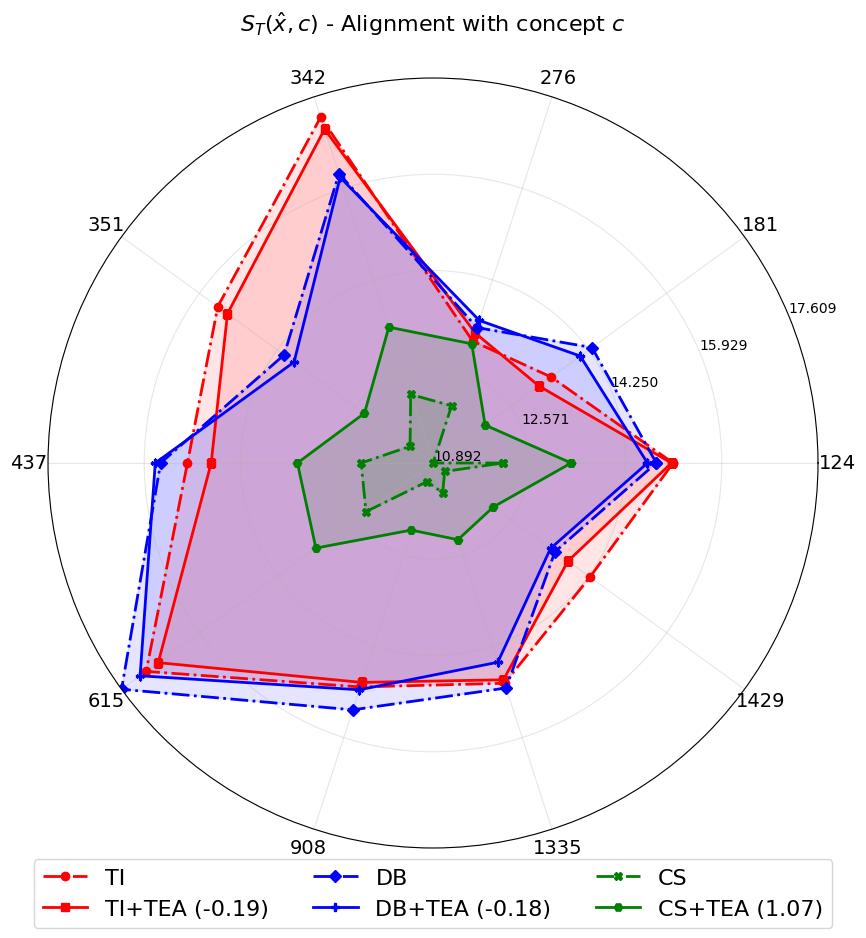

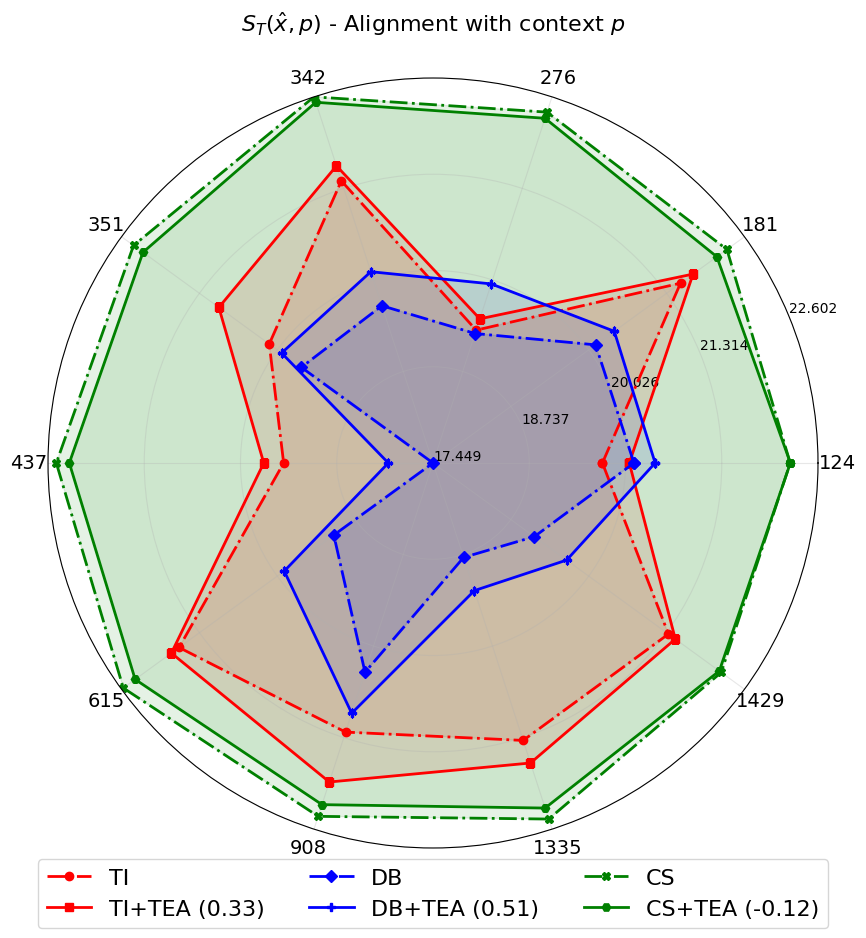

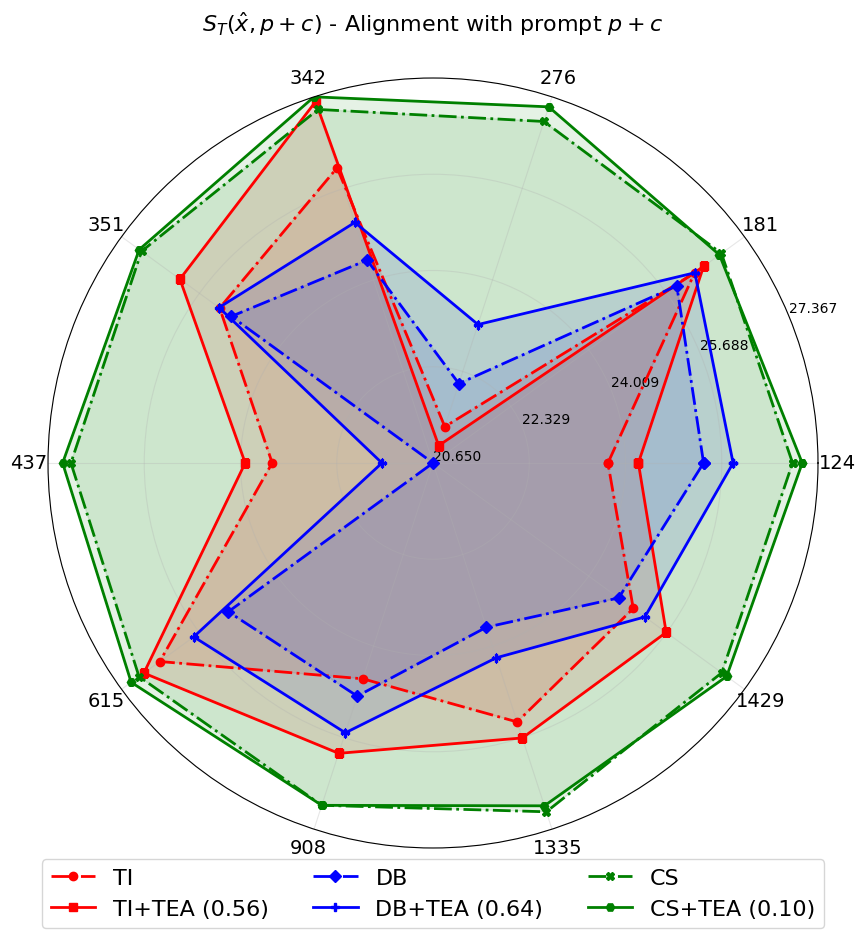

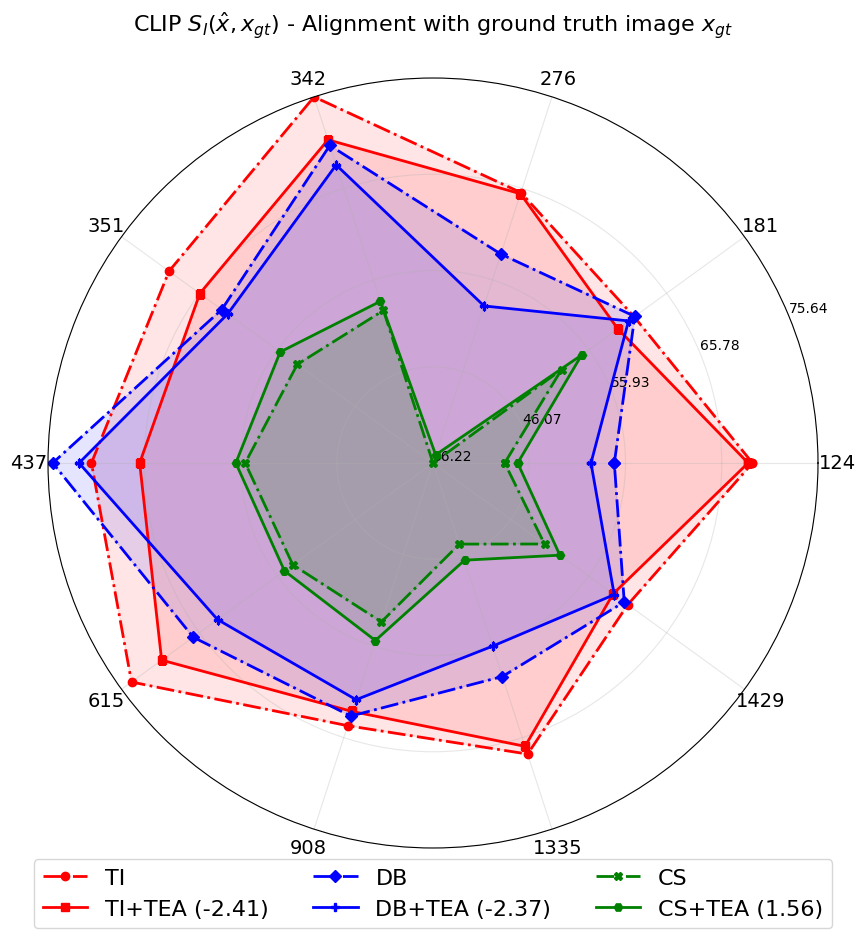

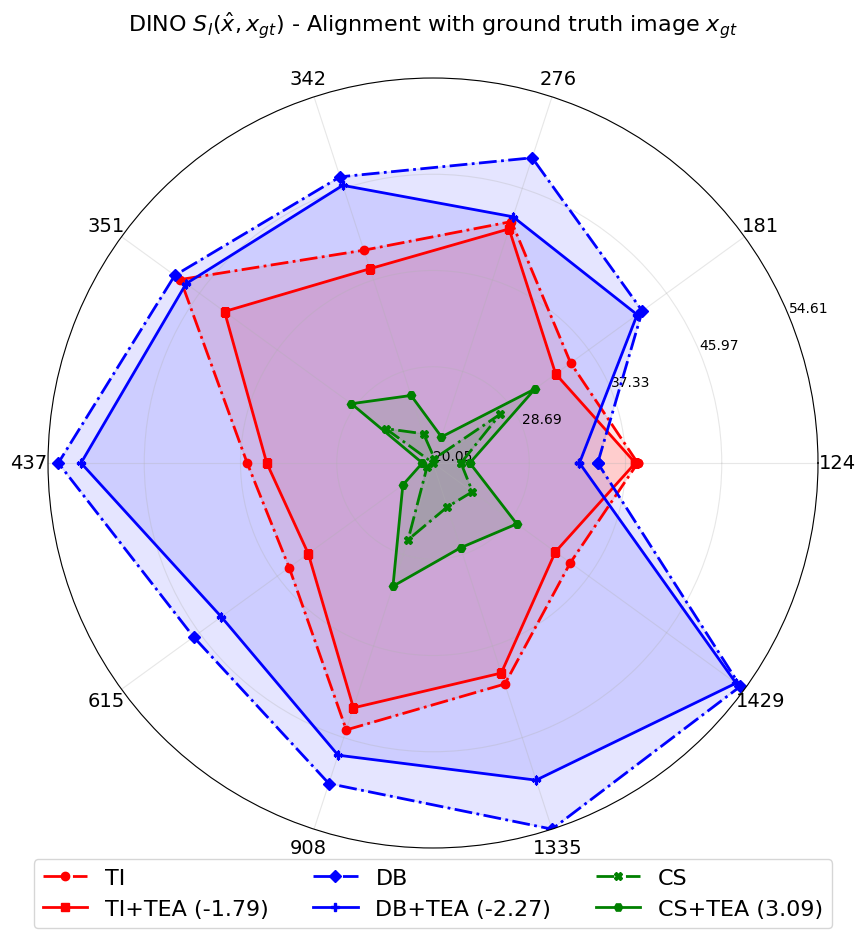

In [5]:
# all_results[exp_name][method][metric]['mean'] 
# plot a radar chart to compare the performance of the methods
# each metric is a separate radar chart 

import matplotlib.pyplot as plt
import numpy as np

# colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
# markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
# line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']

colors = ['red', 'red', 'blue', 'blue', 'green', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
line_styles = ['-.', '-', '-.', '-', '-.', '-']

# 'pet_dog1',
# 'pet_cat1',
# 'plushie_tortoise', 
# 'plushie_teddybear',
# 'furniture_chair1', 
# 'furniture_table1',
# 'flower_1',
# 'decoritems_woodenpot',
# 'scene_barn',   

def assign_label(label):
    if label == 'custom_prompt_A':
        return r'$S_T(\hat{x}, c)$ - Alignment with concept $c$'
    elif label == 'custom_prompt_B':
        return r'$S_T(\hat{x}, p)$ - Alignment with context $p$'
    elif label == 'full_prompt':
        return r'$S_T(\hat{x}, p+c)$ - Alignment with prompt $p+c$'
    elif label == 'vs_anchor_t01':
        return r'CLIP $S_I(\hat{x}, x_{gt})$ - Alignment with ground truth image $x_{gt}$'
    elif label == 'dino_t01':
        return r'DINO $S_I(\hat{x}, x_{gt})$ - Alignment with ground truth image $x_{gt}$'
    elif label == 'pet_dog1':
        return 'dog'
    elif label == 'pet_cat1':
        return 'cat'
    elif label == 'plushie_tortoise':
        return 'tortoise'
    elif label == 'plushie_teddybear':
        return 'teddy bear'
    elif label == 'furniture_chair1':
        return 'chair'
    elif label == 'furniture_table1':
        return 'table'
    elif label == 'flower_1':
        return 'flower'
    elif label == 'decoritems_woodenpot':
        return 'wooden pot'
    elif label == 'scene_barn':
        return 'barn'
    else:
        return label
        
        

def assign_legend(method, method_data):
    if method == 'TI':
        return r'TI'
    elif method == 'DB':
        return r'DB'
    elif method == 'CS':
        return r'CS'
    elif method == 'TI+TEA':
        gap = [method_data['TI+TEA'][i] - method_data['TI'][i] for i in range(len(method_data['TI']))]
        return r'TI+TEA' + f' ({np.mean(gap):.2f})'
    elif method == 'DB+TEA':
        gap = [method_data['DB+TEA'][i] - method_data['DB'][i] for i in range(len(method_data['DB']))]
        return r'DB+TEA' + f' ({np.mean(gap):.2f})'
    elif method == 'CS+TEA':
        gap = [method_data['CS+TEA'][i] - method_data['CS'][i] for i in range(len(method_data['CS']))]
        return r'CS+TEA' + f' ({np.mean(gap):.2f})'
        
for metric in metrics_list:
    # Get all exp_names and methods
    exp_names = list(all_results.keys())
    methods = list(all_results[list(all_results.keys())[0]].keys())
    
    # Set up the radar chart
    N = len(exp_names)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Scale factor for dino_t01
    scale = 100 if metric == 'dino_t01' else 1
    
    # Collect all values first to determine appropriate limits
    all_values = []
    method_data = {}
    
    # Plot each method as a separate line
    for i, method in enumerate(methods):
        values = []
        
        for exp_name in exp_names:
            if method in all_results[exp_name] and metric in all_results[exp_name][method]:
                temp = all_results[exp_name][method][metric]
                temp_values = [temp[j]['mean'] * scale for j in temp.keys()]
                values.append(np.mean(temp_values))
            else:
                values.append(0)  # Default value if data not available
        
        all_values.extend(values)
        method_data[method] = values.copy()
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=assign_legend(method, method_data), 
                color=colors[i % len(colors)], marker=markers[i % len(markers)], 
                linestyle=line_styles[i % len(line_styles)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])
    
    # Set appropriate limits and ticks for better visualization
    # min_val = min(all_values) * 0.9  # Add some padding
    # max_val = max(all_values) * 1.1  # Add some padding
    min_val = min(all_values) * 1.0  # Add some padding
    max_val = max(all_values) * 1.0  # Add some padding

    # Avoid too small range
    if max_val - min_val < 0.1:
        center = (max_val + min_val) / 2
        min_val = center - 0.05
        max_val = center + 0.05
    
    ax.set_ylim(min_val, max_val)
    
    # Set custom radial ticks for cleaner appearance
    tick_range = np.linspace(min_val, max_val, 5)
    ax.set_rticks(tick_range)
    ax.set_rmax(max_val)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([assign_label(exp_name) for exp_name in exp_names], fontsize=14)
    ax.set_title(f'{assign_label(metric)}', size=16, y=1.05)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=3, fontsize=16)
    ax.grid(True, alpha=0.3)
    plt.savefig(f'results/radar_chart_{setting_name}_{metric}.png', dpi=300)


In [31]:
method_data

{'TI': [42.26304368560131,
  55.982595015890325,
  51.92189328315166,
  40.78379054482166,
  40.48492671055003,
  37.26584475501799,
  43.89082898314182,
  54.43804530684765,
  54.96146016338697],
 'TI+TEA': [41.984455191745205,
  52.11889343416052,
  49.33803273508182,
  39.99915109001673,
  32.78835425225015,
  32.007880179068216,
  35.907694005049194,
  52.44821047553649,
  51.07853638008237],
 'DB': [50.154560648478,
  70.28979945641298,
  75.73479769780086,
  53.4269817517354,
  77.51383741543843,
  73.34991754935338,
  65.97605898976326,
  62.64648534242924,
  65.96019677932446],
 'DB+TEA': [50.80169665174825,
  85.47689349310738,
  70.89856230786869,
  53.003996044397354,
  72.40408774146012,
  77.33427704870701,
  54.468783806477276,
  76.78820853508435,
  59.22324538001647],
 'CS': [36.203332914837766,
  55.00834941704358,
  54.78086912206241,
  39.8711730497224,
  34.346956902848824,
  36.580875017014996,
  32.018502649452,
  55.82267498740783,
  41.08885826972815],
 'CS+TEA'

In [15]:
print(all_results.keys())
print(all_results['TI'].keys())
print(all_results['TI']['custom_prompt_A'].keys())
print(all_results['TI']['custom_prompt_A'][step].keys())
print(all_results['TI']['custom_prompt_A'][step][0].keys())
print(all_results['TI']['custom_prompt_A'][step][0]['prompt'])

dict_keys(['TI', '$\\rho=0.20,\\alpha=0.5$', '$\\rho=0.25,\\alpha=0.5$', '$\\rho=0.30,\\alpha=0.5$', '$\\rho=0.35,\\alpha=0.5$'])
dict_keys(['custom_prompt_A', 'custom_prompt_B', 'full_prompt', 'vs_anchor_t01'])
dict_keys([1000])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dict_keys(['prompt', 'mean', 'std', 'min', 'max', 'median'])
 a barn


In [16]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']

ax1_list = ['custom_prompt_A', 'custom_prompt_B', 'full_prompt']
ax2_list = ['vs_anchor_t01']

Metric: custom_prompt_A, Method: TI, Iteration: 1000, Avg Value: 22.398193428332988, Std Value: 2.5954528526332585
Metric: custom_prompt_A, Method: $\rho=0.20,\alpha=0.5$, Iteration: 1000, Avg Value: 22.331270285386307, Std Value: 2.973244802307312
Metric: custom_prompt_A, Method: $\rho=0.25,\alpha=0.5$, Iteration: 1000, Avg Value: 22.22939837088952, Std Value: 3.1485662999479493
Metric: custom_prompt_A, Method: $\rho=0.30,\alpha=0.5$, Iteration: 1000, Avg Value: 22.129179969200724, Std Value: 3.2300201932321286
Metric: custom_prompt_A, Method: $\rho=0.35,\alpha=0.5$, Iteration: 1000, Avg Value: 21.91442680945763, Std Value: 3.4896463946399967
Metric: custom_prompt_B, Method: TI, Iteration: 1000, Avg Value: 21.27818427159236, Std Value: 3.3757430159786286
Metric: custom_prompt_B, Method: $\rho=0.20,\alpha=0.5$, Iteration: 1000, Avg Value: 21.714338981921856, Std Value: 2.8080950569347443
Metric: custom_prompt_B, Method: $\rho=0.25,\alpha=0.5$, Iteration: 1000, Avg Value: 21.83617446019

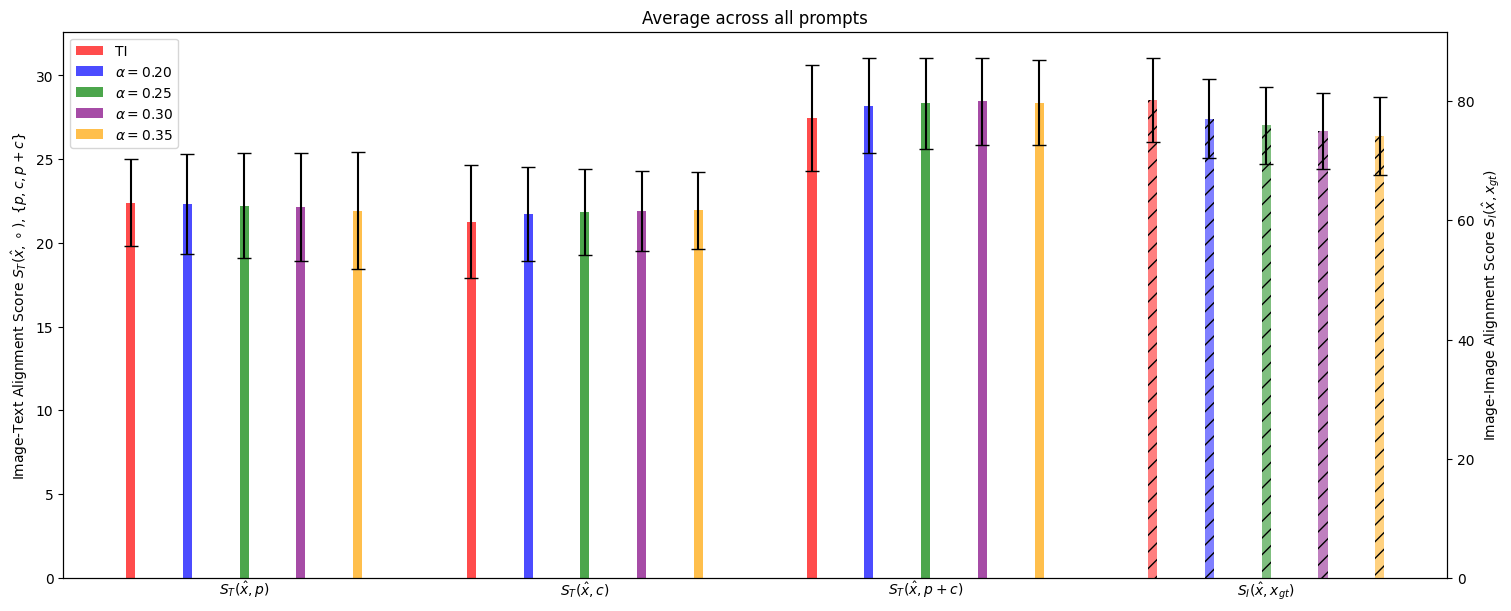

In [17]:
import matplotlib.pyplot as plt

def assign_label(label):
    if label == 'custom_prompt_A':
        return r'$S_T(\hat{x}, p)$'
    elif label == 'custom_prompt_B':
        return r'$S_T(\hat{x}, c)$'
    elif label == 'full_prompt':
        return r'$S_T(\hat{x}, p+c)$'
    elif label == 'vs_anchor_t01':
        return r'$S_I(\hat{x}, x_{gt})$'
    elif label == r'$\rho=0.20,\alpha=0.5$':
        return r'$\alpha=0.20$'
    elif label == r'$\rho=0.25,\alpha=0.5$':
        return r'$\alpha=0.25$'
    elif label == r'$\rho=0.30,\alpha=0.5$':
        return r'$\alpha=0.30$'
    elif label == r'$\rho=0.35,\alpha=0.5$':
        return r'$\alpha=0.35$'
    elif label == 'TI':
        return r'TI'
    

# Create a figure for the average over all prompts
fig, ax1 = plt.figure(figsize=(15, 6), constrained_layout=True), plt.axes()
ax2 = ax1.twinx()

methods = list(all_results.keys())
n_methods = len(methods)
bar_width = 0.8 / n_methods

# First plot metrics for ax1
for m_idx, metric in enumerate(ax1_list):
    # Set x positions for this metric group
    group_pos = m_idx * (len(methods) + 1)  # Add spacing between groups
    
    for i, method in enumerate(methods):
        if metric in all_results[method]:
            iteration = list(all_results[method][metric].keys())[0]  # Just use the first iteration
            # Calculate average over all prompt indices
            values = [all_results[method][metric][iteration][prompt_index]['mean'] 
                     for prompt_index in all_results[method][metric][iteration].keys()]
            avg_value = np.mean(values)
            std_value = np.std(values)
            
            pos = group_pos + i
            ax1.bar(pos, avg_value, width=bar_width,
                   color=colors[i],
                   label=f"{assign_label(method)}" if m_idx == 0 else "",
                   alpha=0.7,
                   yerr=std_value,
                   capsize=5)
            print(f"Metric: {metric}, Method: {method}, Iteration: {iteration}, Avg Value: {avg_value}, Std Value: {std_value}")
    
    # Add metric group label
    ax1.text(group_pos + (n_methods-1)/2, ax1.get_ylim()[0] - 1.0, 
            assign_label(metric), ha='center', fontsize=10, fontweight='bold')

# Then plot metrics for ax2 with different scale if needed
start_pos = len(ax1_list) * (len(methods) + 1)
for m_idx, metric in enumerate(ax2_list):
    group_pos = start_pos + m_idx * (len(methods) + 1)
    
    for i, method in enumerate(methods):
        if metric in all_results[method]:
            iteration = list(all_results[method][metric].keys())[0]
            # Calculate average over all prompt indices
            values = [all_results[method][metric][iteration][prompt_index]['mean'] 
                     for prompt_index in all_results[method][metric][iteration].keys()]
            avg_value = np.mean(values)
            std_value = np.std(values)
            pos = group_pos + i
            ax2.bar(pos, avg_value, width=bar_width,
                   color=colors[i], hatch='//',
                   alpha=0.5,
                   yerr=std_value,
                   capsize=5)
            print(f"Metric: {metric}, Method: {method}, Iteration: {iteration}, Avg Value: {avg_value}, Std Value: {std_value}")
    # Add metric group label
    ax1.text(group_pos + (n_methods-1)/2, ax1.get_ylim()[0] - 1.0,  # Moved text lower by offsetting y position
            assign_label(metric), ha='center', fontsize=10, fontweight='bold')

ax1.set_xticks([])  # Hide x ticks since we're using custom labels

# Create a custom legend for methods
ax1.legend(loc='upper left')

# Set titles and labels
plt.title("Average across all prompts")
ax1.set_ylabel(r'Image-Text Alignment Score $S_T(\hat{x}, \circ)$, $\{p, c, p+c\}$')
ax2.set_ylabel(r'Image-Image Alignment Score $S_I(\hat{x}, x_{gt})$')

# ax1.set_ylim(15, 30)
plt.show()